<a href="https://colab.research.google.com/github/TurMod/Data-Science-HW/blob/main/Hw5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
import pandas as pd
import numpy as np

In [6]:
import os
def multiple_df_conc(df, directory):
  df_new = pd.read_csv(df)
  for filename in os.scandir(directory):
    if filename.is_file():
      df1 = pd.read_csv(filename.path)
      df_new = pd.concat([df_new, df1], ignore_index=True)
  return df_new

In [7]:
directory = 'data/walking'
df = directory + '/walking-1.csv'

df_walking = multiple_df_conc(df, directory)
df_walking.shape

(41670, 3)

In [8]:
directory = 'data/running'
df = directory + '/running-100.csv'

df_running = multiple_df_conc(df, directory)
df_running.shape

(44970, 3)

In [9]:
directory = 'data/idle'
df = directory + '/idle-1.csv'

df_idle = multiple_df_conc(df, directory)
df_idle.shape

(31200, 3)

In [10]:
directory = 'data/stairs'
df = directory + '/stairs-1.csv'

df_stairs = multiple_df_conc(df, directory)
df_stairs.shape

(4980, 3)

In [11]:
X = pd.concat([df_walking, df_running, df_idle, df_stairs], ignore_index=True)
X

,accelerometer_X,accelerometer_Y,accelerometer_Z
0,2.322376,3.643975,11.827356
1,1.781286,4.668694,6.148310
2,7.963115,-4.113238,1.359907
3,1.996764,-1.398214,1.163582
4,5.185841,-12.143391,4.687847
...,...,...,...
122815,0.588974,-5.999869,-2.327164
122816,1.431733,-8.274360,-1.738190
122817,-1.786074,-7.996633,-3.327940
122818,0.885855,-11.468226,5.544971


In [18]:
df_walking_val = np.arange(41670)
df_walking_val.fill(0)
df_running_val = np.arange(44970)
df_running_val.fill(1)
df_idle_val = np.arange(31200)
df_idle_val.fill(2)
df_stairs_val = np.arange(4980)
df_stairs_val.fill(3)
df_stairs_val.shape

(4980,)

In [19]:
y = np.concatenate((df_walking_val, df_running_val, df_idle_val, df_stairs_val), axis=None)
y.shape

(122820,)

In [20]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [21]:
from sklearn import svm

model = svm.SVC()
model.fit(X_train, y_train)

SVC()

In [22]:
model.score(X_test, y_test)

0.8905308581664224

In [23]:
y_pred = model.predict(X_test)

In [24]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.81      0.95      0.87      8455
           1       0.93      0.87      0.90      9002
           2       0.97      0.99      0.98      6113
           3       1.00      0.01      0.02       994

    accuracy                           0.89     24564
   macro avg       0.93      0.70      0.69     24564
weighted avg       0.90      0.89      0.87     24564



In [25]:
from sklearn.ensemble import RandomForestClassifier

clfs = []

for i in range(1, 21):
  clf = RandomForestClassifier(max_depth=i)
  clf.fit(X_train, y_train)
  clfs.append(clf)

In [26]:
from sklearn.metrics import f1_score

f1_train = [f1_score(y_train, c.predict(X_train), average='macro') for c in clfs]
f1_test = [f1_score(y_test, c.predict(X_test), average='macro') for c in clfs]

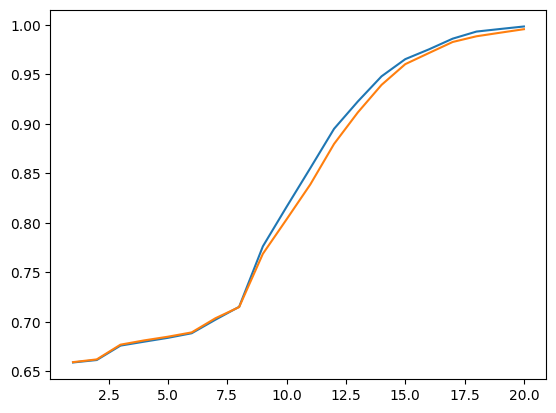

In [27]:
import matplotlib.pyplot as plt


plt.plot(list(range(1, 21)), f1_train)
plt.plot(list(range(1, 21)), f1_test)

In [28]:
clf = RandomForestClassifier(max_depth=20)
clf.fit(X_train, y_train)

RandomForestClassifier(max_depth=20)

In [29]:
y_pred = clf.predict(X_test)

In [30]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.99      1.00      1.00      8455
           1       1.00      1.00      1.00      9002
           2       1.00      1.00      1.00      6113
           3       1.00      0.97      0.98       994

    accuracy                           1.00     24564
   macro avg       1.00      0.99      0.99     24564
weighted avg       1.00      1.00      1.00     24564



**По всім трьом метрикам алгоритм випадкового дерева справляється краще.**